# European Cities Temperature Clustering with the T-SNE algorithm

## Dataset: Average Monthly Temperatures for Several Cities around Europe
### Sourced: http://factominer.free.fr/course/MOOC.html

### Motivation: The above resource by F. Husson shows that using simple PCA  analysis will discrimate cities by average temperature PC1 and by amplitude (hottest temp- coldest temp) PC2 (which is obvious when you think about it).  
### A more sophisticated algorithm may  a) find less obvious patterns and b)better disciminate amplitude so as to help with clustering.  

## Version 2: Feature engineer change in temperatures from the mean.

In [ ]:

## Required output: 
## - Cluster number for each city
## - Line chart visualizations each city in facet chart.

In [3]:
# Imports
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.manifold import TSNE

In [4]:
# Potentially Useful variables

# A list of months
lstMonths = ['January', 'February', 'March', 'April', 'May', 'June', 
             'July', 'August','September' , 'October', 'November', 'December'] 

# A lookup from month name to number 
df_month_lookup = pd.DataFrame ( {'Month':  lstMonths } )
df_month_lookup['MonthNo'] = df_month_lookup.index + 1
df_month_lookup = df_month_lookup.set_index ('Month')
df_month_lookup['MonthNo'].astype (str)

Month
January       1
February      2
March         3
April         4
May           5
June          6
July          7
August        8
September     9
October      10
November     11
December     12
Name: MonthNo, dtype: object

In [5]:
# Read in Data
df = pd.read_csv ( 'http://factominer.free.fr/course/donnees/data_clustering_Temperature.csv', sep=';')
df.head ()

,Unnamed: 0,January,February,March,April,May,June,July,August,September,October,November,December,Annual,Amplitude,Latitude,Longitude,Area
0,Amsterdam,2.9,2.5,5.7,8.2,12.5,14.8,17.1,17.1,14.5,11.4,7.0,4.4,9.9,14.6,52.2,4.5,West
1,Athens,9.1,9.7,11.7,15.4,20.1,24.5,27.4,27.2,23.8,19.2,14.6,11.0,17.8,18.3,37.6,23.5,South
2,Berlin,-0.2,0.1,4.4,8.2,13.8,16.0,18.3,18.0,14.4,10.0,4.2,1.2,9.1,18.5,52.3,13.2,West
3,Brussels,3.3,3.3,6.7,8.9,12.8,15.6,17.8,17.8,15.0,11.1,6.7,4.4,10.3,14.4,50.5,4.2,West
4,Budapest,-1.1,0.8,5.5,11.6,17.0,20.2,22.0,21.3,16.9,11.3,5.1,0.7,10.9,23.1,47.3,19.0,East


In [6]:
# Obtain some data to process..
df.columns = np.insert ( df.columns[1:], 0,'Country' ,axis=0)
df_train = df.drop(df.columns[[13,14,15,16,17]], axis=1, inplace=False)
df_train.head ()

,Country,January,February,March,April,May,June,July,August,September,October,November,December
0,Amsterdam,2.9,2.5,5.7,8.2,12.5,14.8,17.1,17.1,14.5,11.4,7.0,4.4
1,Athens,9.1,9.7,11.7,15.4,20.1,24.5,27.4,27.2,23.8,19.2,14.6,11.0
2,Berlin,-0.2,0.1,4.4,8.2,13.8,16.0,18.3,18.0,14.4,10.0,4.2,1.2
3,Brussels,3.3,3.3,6.7,8.9,12.8,15.6,17.8,17.8,15.0,11.1,6.7,4.4
4,Budapest,-1.1,0.8,5.5,11.6,17.0,20.2,22.0,21.3,16.9,11.3,5.1,0.7


In [25]:
# V2 Feature engineering step, Create new columns representing difference from the overall copuntry mean for each city
monthlyMeansArray = df [ lstMonths ].mean (axis = 0)  # averages for January, February ... December across cities

#df [ lstMonths ].mean (axis = 1) # this would do annual average for a city which we already have ( annual column)
dfMonthlyDifFromMeans = df_train [ lstMonths ]  / monthlyMeansArray

# Need to change the column names from e.g. 'January' to 'JanuaryMD'...  mean deviation
dfMonthlyDifFromMeans.columns = [i + 'MD' for i in dfMonthlyDifFromMeans]

# Slot the new columns to df_train
df_train = pd.concat ( [df_train, dfMonthlyDifFromMeans], axis=1)

In [26]:
# Run the TNE algorithm
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, perplexity = 15).fit_transform( df_train.iloc [ : , 1:] ) # Exclude Country


In [27]:
# Merge together
df_out = pd.concat ( [df, pd.DataFrame ( X_embedded, columns =['d1','d2'] )], axis=1 )
df_out.head()

,Country,January,February,March,April,May,June,July,August,September,October,November,December,Annual,Amplitude,Latitude,Longitude,Area,d1,d2
0,Amsterdam,2.9,2.5,5.7,8.2,12.5,14.8,17.1,17.1,14.5,11.4,7.0,4.4,9.9,14.6,52.2,4.5,West,5.873405,-10.509941
1,Athens,9.1,9.7,11.7,15.4,20.1,24.5,27.4,27.2,23.8,19.2,14.6,11.0,17.8,18.3,37.6,23.5,South,-76.856049,-109.792778
2,Berlin,-0.2,0.1,4.4,8.2,13.8,16.0,18.3,18.0,14.4,10.0,4.2,1.2,9.1,18.5,52.3,13.2,West,-7.985556,46.751625
3,Brussels,3.3,3.3,6.7,8.9,12.8,15.6,17.8,17.8,15.0,11.1,6.7,4.4,10.3,14.4,50.5,4.2,West,-23.921516,-14.746290
4,Budapest,-1.1,0.8,5.5,11.6,17.0,20.2,22.0,21.3,16.9,11.3,5.1,0.7,10.9,23.1,47.3,19.0,East,43.669281,36.346111


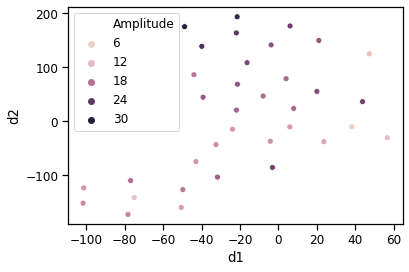

In [28]:
 
sns.set_context ('notebook', font_scale =1.1)
sns.set_style = ('ticks')
sns.scatterplot ( x = 'd1', y='d2', data = df_out, hue='Amplitude')

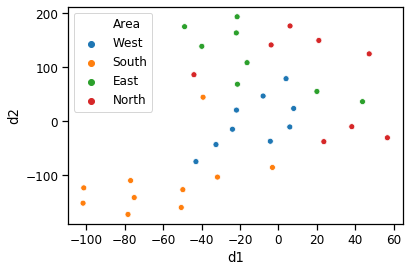

In [29]:
sns.set_context ('notebook', font_scale =1.1)
sns.set_style = ('ticks')
sns.scatterplot ( x = 'd1', y='d2', data = df_out, hue='Area')

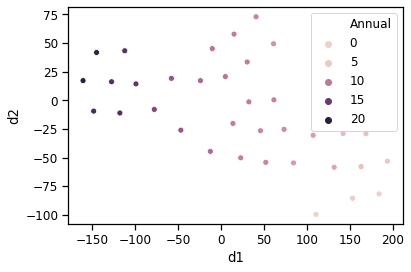

In [12]:
sns.set_context ('notebook', font_scale =1.1)
sns.set_style = ('ticks')
sns.scatterplot ( x = 'd1', y='d2', data = df_out, hue='Annual')

In [30]:
# Apply k means
import pandas as pd
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=9)
df_out['cluster'] =   kmeans.fit_predict(  df_out [['d1', 'd2']])

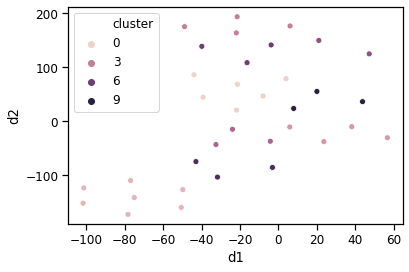

In [31]:
sns.set_context ('notebook', font_scale =1.1)
sns.set_style = ('ticks')
sns.scatterplot ( x = 'd1', y='d2', data = df_out, hue='cluster')

In [32]:
#pd.crosstab(df_out, ['cluster', 'Area'] )     
df_out.groupby(['cluster', 'Area'])['cluster'].count().unstack().fillna(0)


Area,East,North,South,West
cluster,,,,
0,1.0,1.0,1.0,3.0
1,0.0,0.0,7.0,0.0
2,0.0,3.0,0.0,1.0
3,3.0,1.0,0.0,0.0
4,0.0,0.0,0.0,3.0
5,0.0,2.0,0.0,0.0
6,2.0,1.0,0.0,0.0
7,0.0,0.0,2.0,1.0
8,2.0,0.0,0.0,1.0


In [33]:
# Create a column cluster_reorder which labels ascending by Annual average Temparture
df_ordering =  pd.pivot_table(df_out,index=["cluster"],values=["Annual", "Amplitude"],aggfunc=np.mean).sort_values (['Annual', 'Amplitude'])
df_ordering ['cluster_reorder'] = df_ordering.reset_index().index

df_out['OrigIndex'] = df_out.index
df_out  = df_out.set_index ('cluster').join ( df_ordering  [['cluster_reorder']]).set_index (['OrigIndex']).sort_index()

df_out.head (100)

,Country,January,February,March,April,May,June,July,August,September,...,November,December,Annual,Amplitude,Latitude,Longitude,Area,d1,d2,cluster_reorder
OrigIndex,,,,,,,,,,,,,,,,,,,,,
0,Amsterdam,2.9,2.5,5.7,8.2,12.5,14.8,17.1,17.1,14.5,...,7.0,4.4,9.9,14.6,52.2,4.5,West,5.873405,-10.509941,4
1,Athens,9.1,9.7,11.7,15.4,20.1,24.5,27.4,27.2,23.8,...,14.6,11.0,17.8,18.3,37.6,23.5,South,-76.856049,-109.792778,8
2,Berlin,-0.2,0.1,4.4,8.2,13.8,16.0,18.3,18.0,14.4,...,4.2,1.2,9.1,18.5,52.3,13.2,West,-7.985556,46.751625,3
3,Brussels,3.3,3.3,6.7,8.9,12.8,15.6,17.8,17.8,15.0,...,6.7,4.4,10.3,14.4,50.5,4.2,West,-23.921516,-14.746290,6
4,Budapest,-1.1,0.8,5.5,11.6,17.0,20.2,22.0,21.3,16.9,...,5.1,0.7,10.9,23.1,47.3,19.0,East,43.669281,36.346111,5
5,Copenhagen,-0.4,-0.4,1.3,5.8,11.1,15.4,17.1,16.6,13.3,...,4.1,1.3,7.8,17.5,55.4,12.3,North,-43.936096,86.260521,3
6,Dublin,4.8,5.0,5.9,7.8,10.4,13.3,15.0,14.6,12.7,...,6.7,5.4,9.3,10.2,53.2,6.1,North,38.096298,-9.963581,4
7,Elsinki,-5.8,-6.2,-2.7,3.1,10.2,14.0,17.2,14.9,9.7,...,0.1,-2.3,4.8,23.4,60.1,25.0,North,6.007206,176.521454,0
8,Kiev,-5.9,-5.0,-0.3,7.4,14.3,17.8,19.4,18.5,13.7,...,1.2,-3.6,7.1,25.3,50.3,30.3,East,-39.847443,138.784927,2


In [34]:
#df_out = df_out.sort_values (['OrigIndex'])

# Turn the wide table into a long one so that the data can be plotted.

#df_out['OrigIndex'] = df_out.index
#df_unpivoted = df_out.melt(id_vars=[ 'cluster', 'Area', 'Country']
#                          , value_vars = lstMonths
#                          , var_name ='Month'
#                          , value_name='degrees') 

df_unpivoted = df_out.melt(id_vars=['cluster_reorder', 'Area', 'Country', 'Annual'] ,
                          value_vars = lstMonths,
                           var_name ='Month',
                           value_name='degrees') 

df_unpivoted['OrigIndex'] =df_unpivoted.index
df_unpivoted = df_unpivoted.set_index ('Month').join (df_month_lookup ) 
df_unpivoted = df_unpivoted.sort_values (['MonthNo', 'Country']) 
df_unpivoted= df_unpivoted.sort_values (['MonthNo']) 
df_unpivoted = df_unpivoted.set_index ( 'OrigIndex')

#df_unpivoted['MonthNo'] = df_unpivoted['MonthNo'].astype(int)
#df_unpivoted['cluster_reorder'] = df_unpivoted['cluster_reorder'].astype(int)
#df_unpivoted = df_unpivoted.sort_values( [   'Country','MonthNo'] )

#df_unpivoted  = df_unpivoted.sort_values ( [ 'OrigIndex','Country' ])
df_unpivoted.head(200)
#df_unpivoted[


,cluster_reorder,Area,Country,Annual,degrees,MonthNo
OrigIndex,,,,,,
0,4,West,Amsterdam,9.9,2.9,1
30,7,South,Milan,12.6,1.1,1
13,0,East,Minsk,5.5,-6.9,1
14,0,East,Moscow,5.1,-9.3,1
15,2,North,Oslo,5.6,-4.3,1
...,...,...,...,...,...,...
198,6,West,Antwerp,10.3,15.5,6
176,8,South,Athens,17.8,24.5,6
199,8,South,Barcelona,16.2,21.2,6


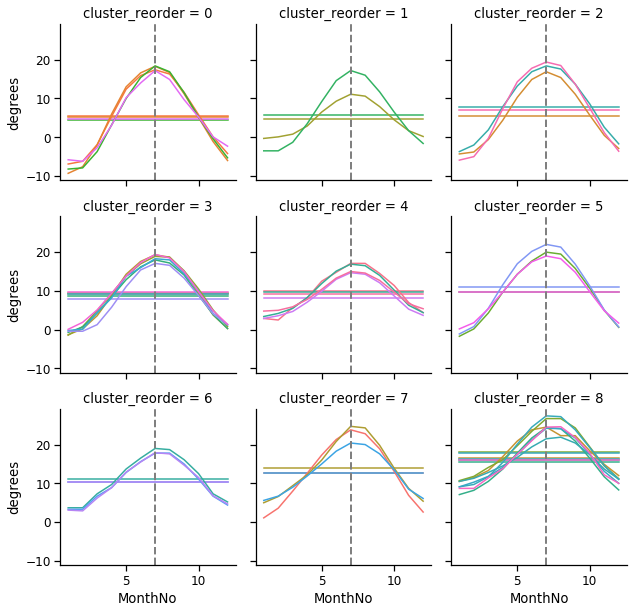

In [36]:
import matplotlib.pyplot as plt 

# Create a grid : initialize it
g = sns.FacetGrid(df_unpivoted, col='cluster_reorder', hue='Country', col_wrap=3)

g = g.map(plt.plot, 'MonthNo', 'Annual')
g = g.map(plt.plot, 'MonthNo', 'degrees')

# Add a title for the whole plot
plt.subplots_adjust(top=0.92)

axes = g.axes.flatten()
for ax in axes:
    ax.axvline(7, ls='--', linewidth=2, color='grey')

plt.show()